## Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

from jenga.basis import Dataset
from jenga.models.simple_model import SimpleModel

In [2]:
seed = 10

In [3]:
dataset = Dataset(seed, "credit-g")

Dataset 'credit-g', target: 'class'
**Author**: Dr. Hans Hofmann  

**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    

**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)



**German Credit data**  

This dataset classifies people described by a set of attributes as good or bad credit risks.



This dataset comes with a cost matrix: 

``` 

      Good  Bad (predicted)  

Good   0    1   (actual)  

Bad    5    0  

```



It is worse to class a customer as go

Attribute types: 


,attribute_names,categorical_indicator
0,checking_status,True
1,duration,False
2,credit_history,True
3,purpose,True
4,credit_amount,False
5,savings_status,True
6,employment,True
7,installment_commitment,False
8,personal_status,True
9,other_parties,True


In [4]:
all_data = dataset.all_data
all_data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [5]:
attribute_names = dataset.attribute_names
attribute_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [6]:
attribute_types = dataset.attribute_types
attribute_types

,attribute_names,categorical_indicator
0,checking_status,True
1,duration,False
2,credit_history,True
3,purpose,True
4,credit_amount,False
5,savings_status,True
6,employment,True
7,installment_commitment,False
8,personal_status,True
9,other_parties,True


### Visualize the dataset

In [7]:
## plot the original dataset
def hide_current_axis(*args, **kwds):
        plt.gca().set_visible(False)
        
def plot_data(data):
    sns.set_style("white") # grid/no grid style: darkgrid, whitegrid, dark, white, ticks
    
    plot = sns.pairplot(data, hue="class")
    plot.map_upper(hide_current_axis)
    plt.show()

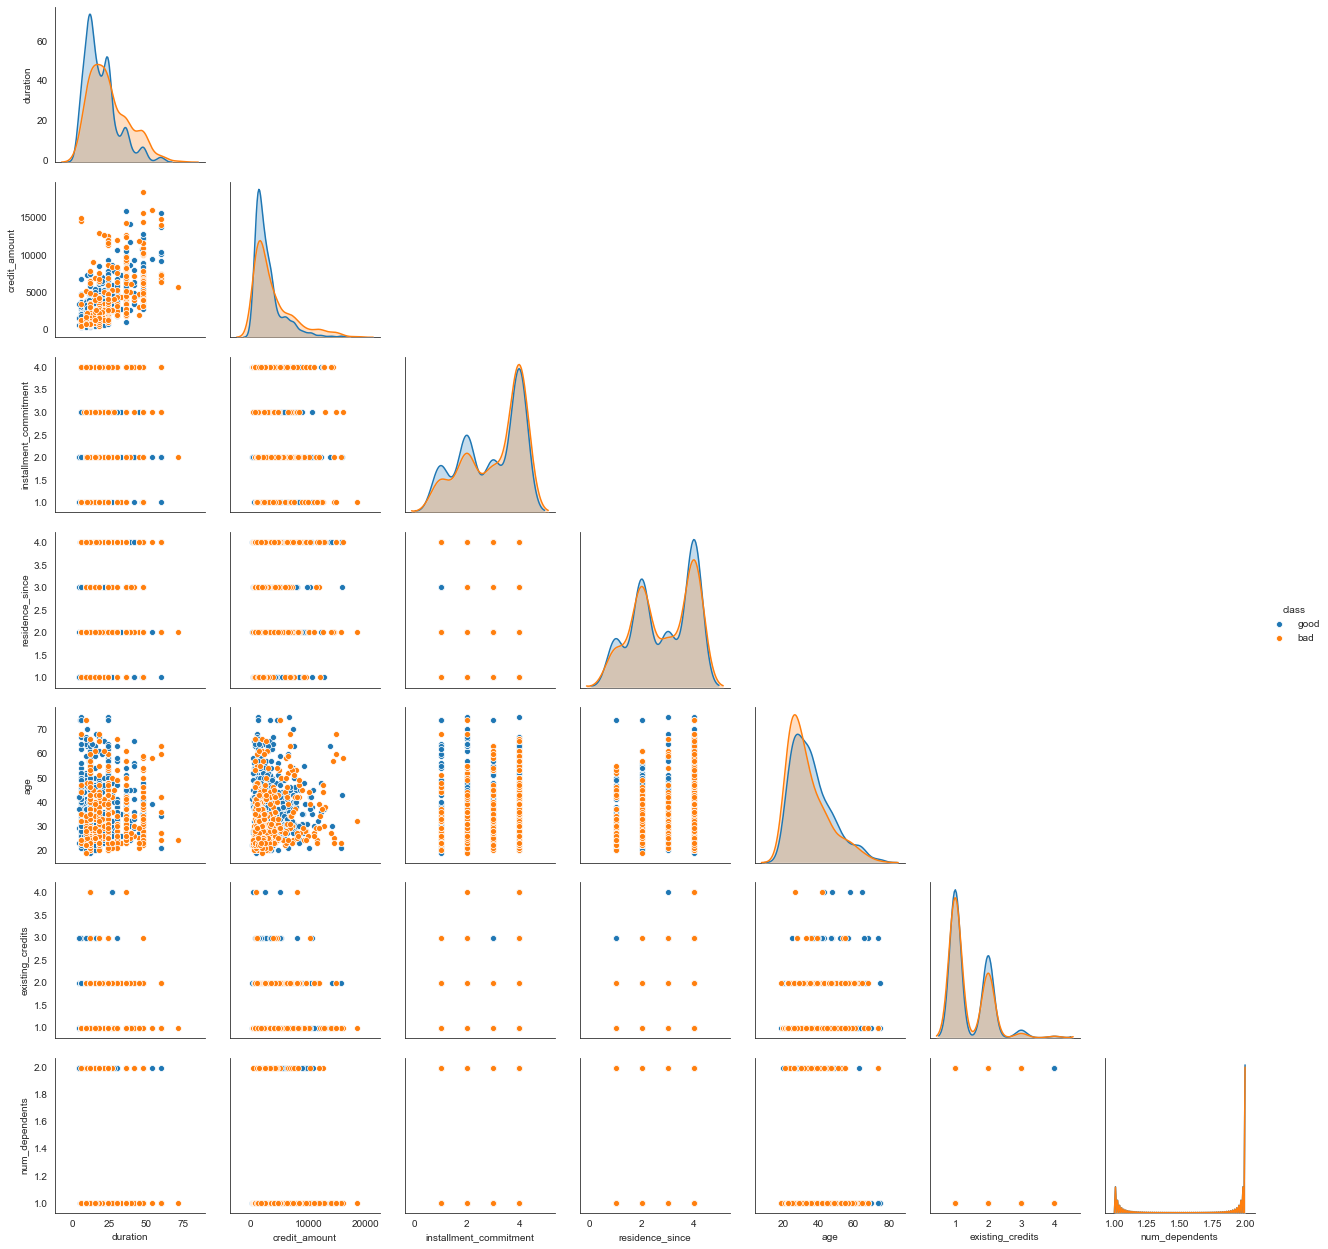

In [8]:
plot_data(all_data)

### Get training and test sets

In [9]:
train_data, train_labels, test_data, test_labels = dataset.get_train_test_data()

display(train_data.head())
print(train_labels[0:5])

display(test_data.head())
print(test_labels[0:5])

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
188,<0,12.0,existing paid,radio/tv,674.0,100<=X<500,4<=X<7,4.0,male mar/wid,none,1.0,life insurance,20.0,none,own,1.0,skilled,1.0,none,yes
194,0<=X<200,45.0,existing paid,radio/tv,3031.0,100<=X<500,1<=X<4,4.0,male single,guarantor,4.0,life insurance,21.0,none,rent,1.0,skilled,1.0,none,yes
225,no checking,36.0,no credits/all paid,repairs,2613.0,<100,1<=X<4,4.0,male single,none,2.0,car,27.0,none,own,2.0,skilled,1.0,none,yes
580,0<=X<200,18.0,critical/other existing credit,new car,1056.0,<100,>=7,3.0,male single,guarantor,3.0,real estate,30.0,bank,own,2.0,skilled,1.0,none,yes
428,no checking,9.0,existing paid,furniture/equipment,1313.0,<100,>=7,1.0,male single,none,4.0,car,20.0,none,own,1.0,skilled,1.0,none,yes


['bad' 'bad' 'good' 'bad' 'good']


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
841,no checking,21.0,delayed previously,used car,2993.0,<100,1<=X<4,3.0,male single,none,2.0,real estate,28.0,stores,own,2.0,unskilled resident,1.0,none,yes
956,>=200,30.0,critical/other existing credit,radio/tv,3656.0,no known savings,>=7,4.0,male single,none,4.0,life insurance,49.0,stores,own,2.0,unskilled resident,1.0,none,yes
544,no checking,12.0,critical/other existing credit,new car,1255.0,<100,>=7,4.0,male single,none,4.0,real estate,61.0,none,own,2.0,unskilled resident,1.0,none,yes
173,0<=X<200,8.0,existing paid,radio/tv,1414.0,<100,1<=X<4,4.0,male single,guarantor,2.0,real estate,33.0,none,own,1.0,skilled,1.0,none,no
759,<0,12.0,critical/other existing credit,new car,691.0,<100,>=7,4.0,male single,none,3.0,life insurance,35.0,none,own,2.0,skilled,1.0,none,yes


['good' 'good' 'good' 'good' 'bad']


## Model

In [10]:
learner = SGDClassifier(max_iter=1000)
param_grid = {
    'learner__loss': ['log'],
    'learner__penalty': ['l2', 'l1', 'elasticnet'],
    'learner__alpha': [0.0001, 0.001, 0.01, 0.1]
}

In [11]:
model_obj = SimpleModel(seed, train_data, train_labels, test_data, test_labels, attribute_types, learner, param_grid)

In [12]:
categorical_columns = model_obj.categorical_columns
categorical_columns

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [13]:
numerical_columms = model_obj.numerical_columms
numerical_columms

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [15]:
model = model_obj.fit_baseline_model(train_data, train_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.1s finished
